# Read the data set

In [508]:
import pandas as pd # type: ignore
df = pd.read_csv('advertising.csv')

In [509]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data set information

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [511]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [512]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Checking for nulls

In [513]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Drop Duplicates

In [514]:
df.drop_duplicates()
df.dropna()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Sorting Data

In [515]:
df_sorted = df.sort_values(by='Sales')

In [516]:
import pandas as pd # type: ignore

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

remove_outliers(df,['TV','Radio','Newspaper','Sales'])

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


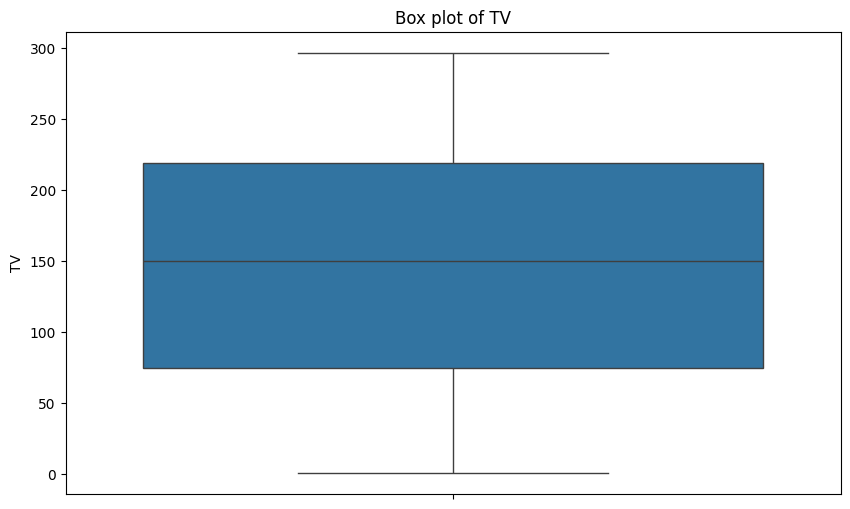

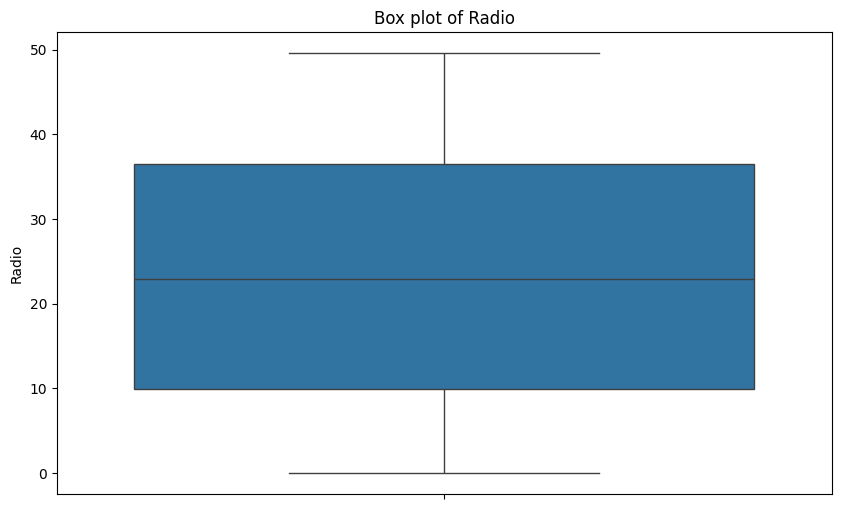

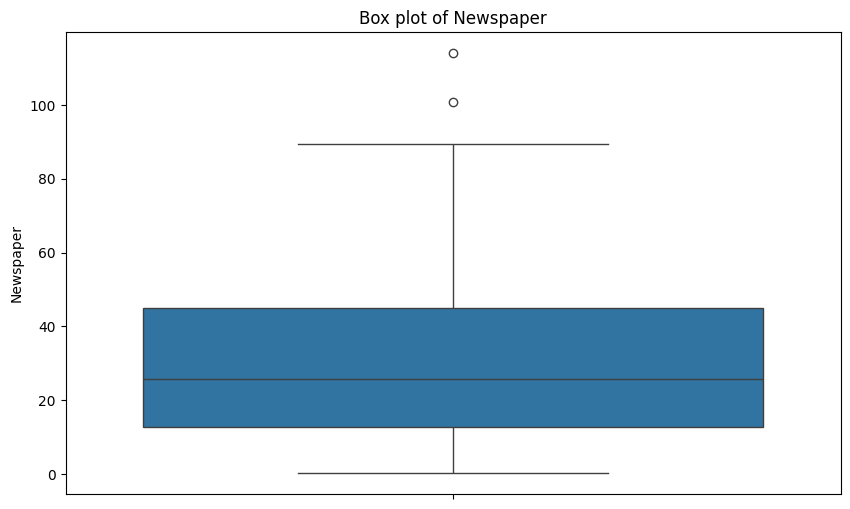

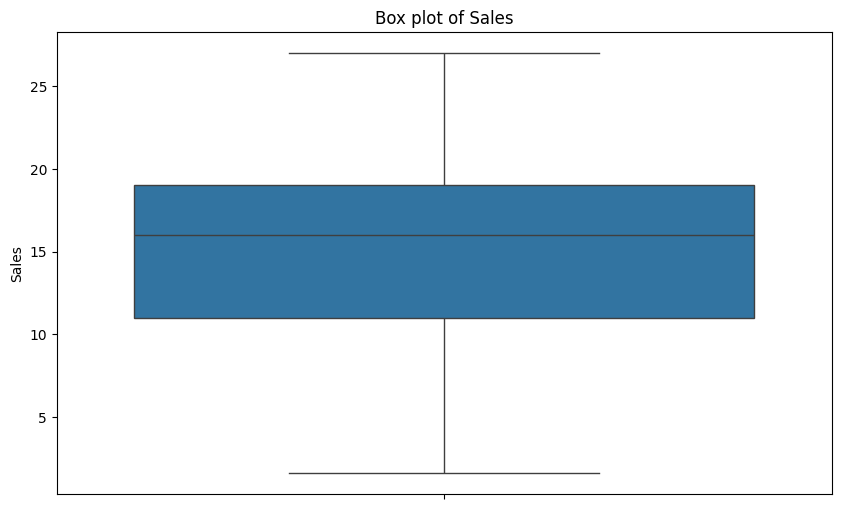

In [517]:
import seaborn as sns 
import matplotlib.pyplot as plt
def vis_quartiles(columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df[col])
        plt.title(f'Box plot of {col}')
        plt.show()
    
vis_quartiles(['TV','Radio','Newspaper','Sales'])

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

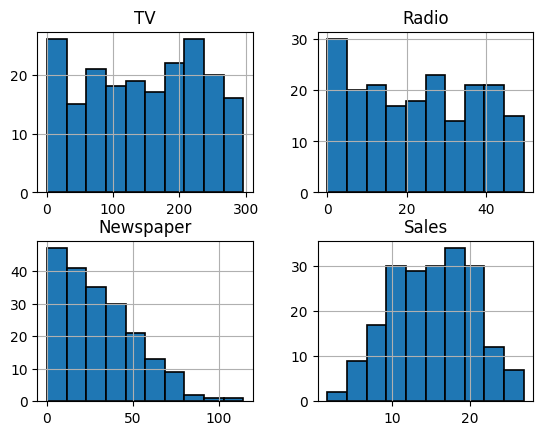

In [518]:
df.hist(edgecolor='black', linewidth=1.2)


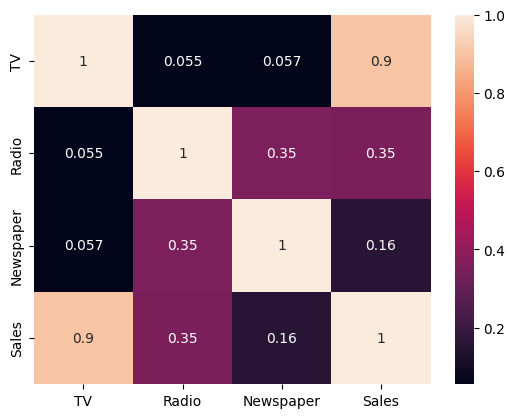

In [519]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()
           

# Splitting the data set into traint and test data

In [520]:
# split X and y into training and
from sklearn.model_selection import train_test_split # type: ignore


X = df.drop(['Sales'], axis=1)
y = df['Sales'] # Target Column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train

,TV,Radio,Newspaper
77,120.5,28.5,14.2
127,80.2,0.0,9.2
5,8.7,48.9,75.0
118,125.7,36.9,79.2
113,209.6,20.6,10.7
...,...,...,...
104,238.2,34.3,5.3
129,59.6,12.0,43.1
183,287.6,43.0,71.8
174,222.4,3.4,13.1


# Feature Scaling

In [521]:
#z=(x-u)/s
from sklearn.preprocessing import StandardScaler # type: ignore
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

# Linear Regression

In [522]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

####  train or fit model


In [523]:
model.fit(X_train,y_train)

LinearRegression()

#### Predict Model

In [524]:
y_pred = model.predict(X_test)
y_pred

array([18.46142557, 15.8175289 , 21.32601101, 24.58723197, 10.42403426,
       21.45006813, 11.95979102, 14.33250357, 11.54673131, 17.62276971,
       23.08970416, 17.88659699,  9.21887898, 14.35588616, 20.44515849,
       21.47820101, 20.93690546, 15.36281995,  8.93552525, 20.37540492,
       17.90814105, 20.78882484, 22.68861295,  9.40942819, 21.69743225,
       20.25479019, 15.36903152, 10.4663061 , 18.83120017, 10.26355412,
       10.91542768,  9.86876985, 16.12055358, 16.10315229, 17.64998722,
        6.5898653 , 16.96073818, 12.29591263, 16.81721549, 11.56162923,
       14.93976568,  9.95273553, 12.98947862,  8.31802234,  6.15433545,
       15.00608336, 18.40538666, 13.22088348,  8.8529888 , 20.64431993,
       17.56144639, 16.64757389, 11.5767124 , 14.64907288,  9.58434028,
       10.39413111, 20.08528192,  9.52403285,  5.2476599 ,  8.67199885])

In [525]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.2873255628331681


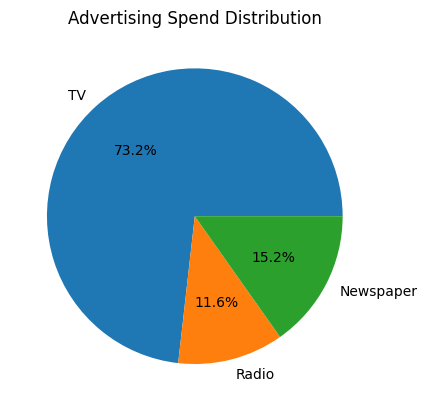

In [526]:
totals = X.sum()

# Create a pie chart
plt.pie(totals, labels=totals.index, autopct='%1.1f%%')
plt.title('Advertising Spend Distribution')
plt.show()

<Axes: >

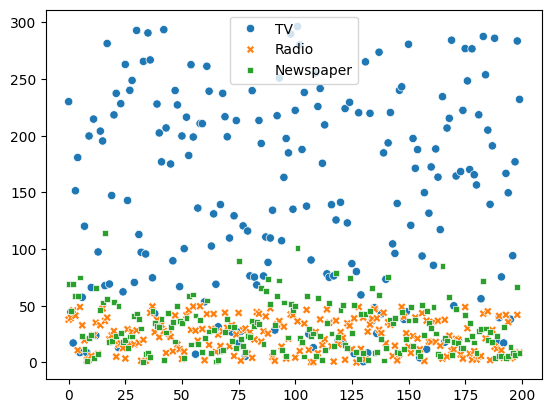

In [527]:
sns.scatterplot(data=X)

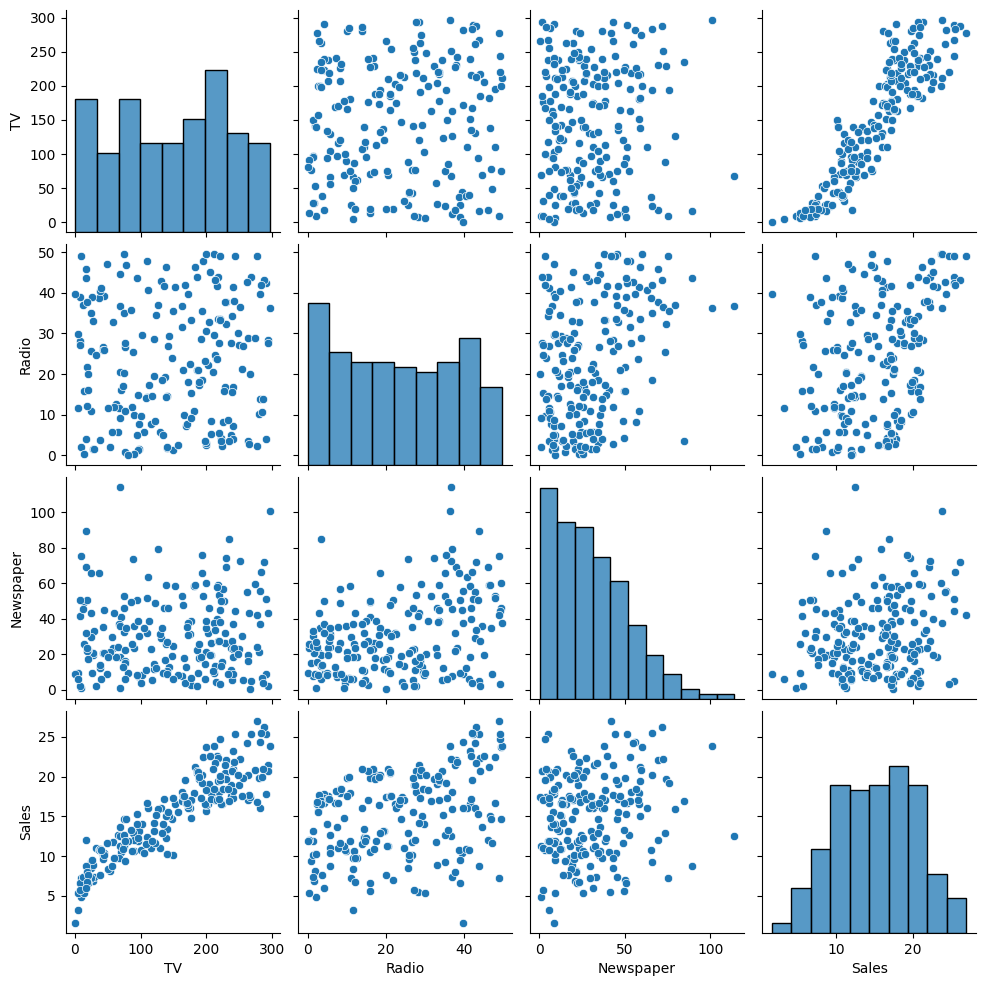

In [528]:
sns.pairplot(data=df)

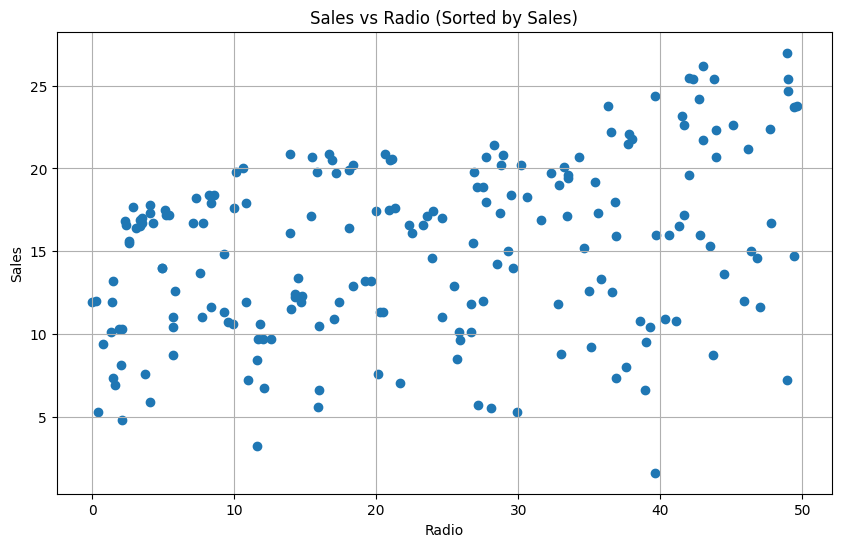

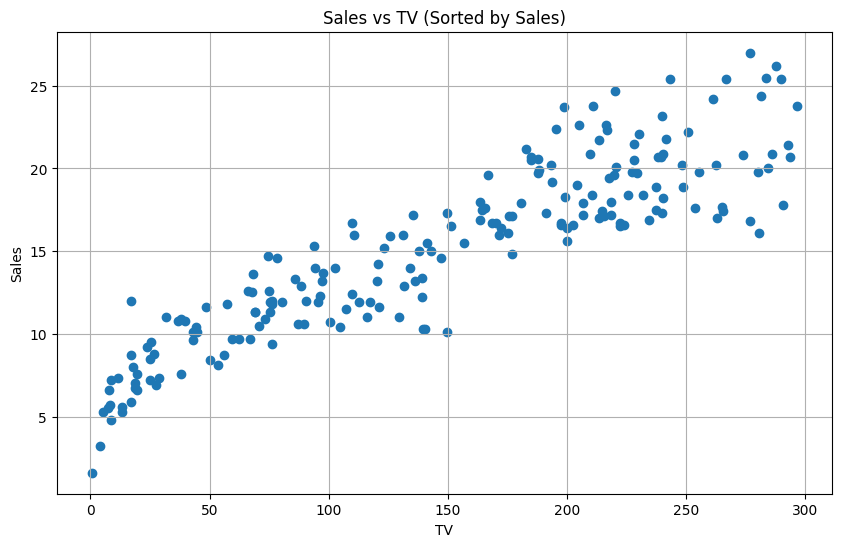

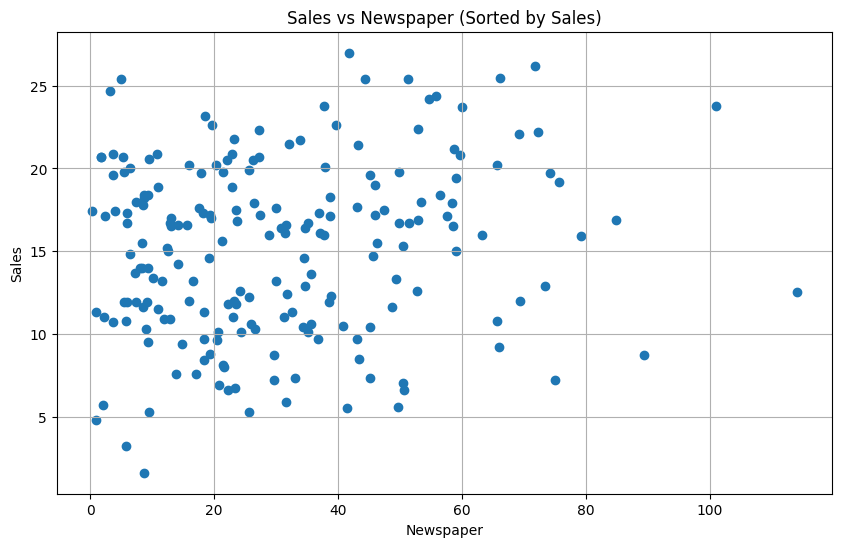

In [529]:

features = ['Radio', 'TV', 'Newspaper']
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_sorted[feature], df_sorted['Sales'])
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(f'Sales vs {feature} (Sorted by Sales)')
    plt.grid(True)
    plt.show()